# ZAD. 1 - LIST 01

## Weibull Distribution

The probability density function (PDF) of the Weibull distribution is given by:

$$
f(T) = \frac{k}{\lambda} \left( \frac{T}{\lambda} \right)^{k-1} e^{-(T/\lambda)^k}
$$

The cumulative distribution function (CDF) is:
$$
F(T) = 1 - e^{-(T/\lambda)^k}
$$


- k < 1: The probability of failure decreases over time (often used to model "infant mortality" in reliability analysis)

- k = 1: Leads to the exponential distribution (constant failure rate)

- k > 1: The probability of failure increases over time (e.g., material wear and tear)


In our case:
- k < 1 (np. 0.5, jak w tym przypadku): większość użytkowników kończy aktywność bardzo szybko, ale niektórzy pozostają dłużej. Odpowiada to rzeczywistym wzorcom użycia serwisów, gdzie wielu użytkowników szybko traci zainteresowanie.

- k = 1 – rozkład wykładniczy, oznaczający stałe prawdopodobieństwo opuszczenia serwisu.

- k > 1 – użytkownicy pozostają aktywni przez dłuższy czas, ale później gwałtownie przestają korzystać.

Weibull: Jest to rozkład **asymetryczny**, co oznacza, że może modelować zarówno szybkie, jak i wolne procesy (np. szybkie zakończenie aktywności lub długotrwałą aktywność). Dzięki parametrowi
𝑘
k, Weibull może przyjąć formę rozpadu szybciej (k < 1) lub wolniejszego spadku (k > 1).

Gauss: Rozkład normalny jest **symetryczny**, co oznacza, że wartości są rozłożone w obu kierunkach (towarzyszą temu jednak bardzo małe prawdopodobieństwa dla skrajnych wartości). Jest to problematyczne, gdy próbujemy modelować zjawiska, w których większa część danych koncentruje się wokół jednego punktu (np. większość użytkowników opuści serwis szybko), a tylko nieliczni zostają na dłużej.

Weibull: Może efektywnie modelować **"grube ogony"**, czyli sytuacje, w których mała część użytkowników pozostaje aktywna przez bardzo długi czas. Takie sytuacje są typowe w przypadku większości aplikacji, gdzie dużo osób rezygnuje szybko, ale nieliczni mogą korzystać z serwisu przez długi czas.

Gauss: Rozkład normalny zakłada, że większość wartości koncentruje się wokół średniej, a prawdopodobieństwo bardzo dużych wartości (np. użytkownicy, którzy pozostają aktywni przez wiele dni) jest bardzo małe. To sprawia, że jest to model mniej realistyczny, kiedy mamy do czynienia z długoterminowymi użytkownikami, którzy są wyjątkami.

Weibull(k=0.5, λ=60):
  Users active after 150 minutes: 225
  Users active after 1440 minutes: 5
  Users active after 2880 minutes: 0
  Users active after 7200 minutes: 0



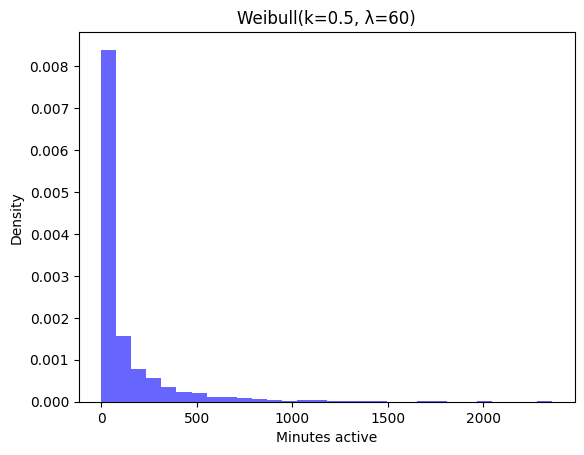

Weibull(k=1.0, λ=60):
  Users active after 150 minutes: 77
  Users active after 1440 minutes: 0
  Users active after 2880 minutes: 0
  Users active after 7200 minutes: 0



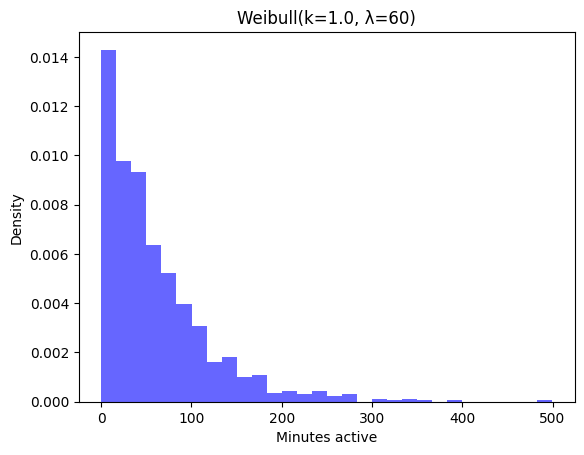

Weibull(k=1.5, λ=60):
  Users active after 150 minutes: 17
  Users active after 1440 minutes: 0
  Users active after 2880 minutes: 0
  Users active after 7200 minutes: 0



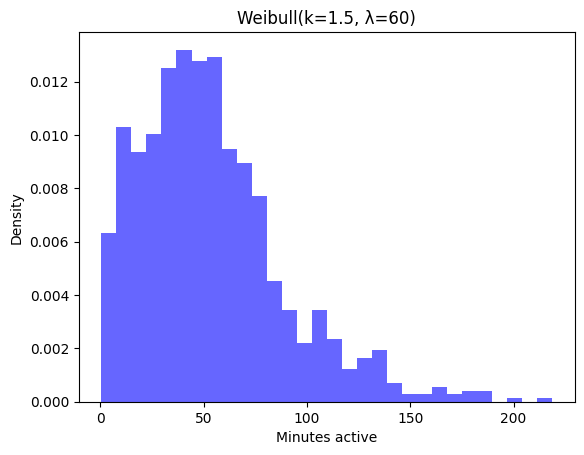

Weibull(k=2.5, λ=60):
  Users active after 150 minutes: 0
  Users active after 1440 minutes: 0
  Users active after 2880 minutes: 0
  Users active after 7200 minutes: 0



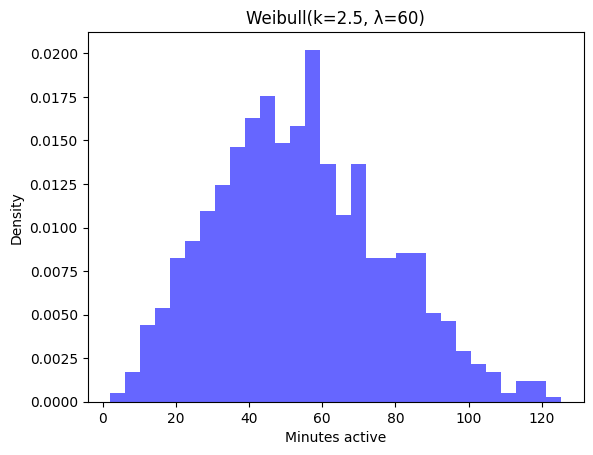

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

N = 1000
time_points = [150, 24*60, 2*24*60, 5*24*60]

params = [(0.5, 60), (1.0, 60), (1.5, 60), (2.5, 60)]

for k, lambda_ in params:
    Tu = stats.weibull_min.rvs(c=k, scale=lambda_, size=N)
    active_users = {t: np.sum(Tu > t) for t in time_points}

    print(f"Weibull(k={k}, λ={lambda_}):")
    for t, count in active_users.items():
        print(f"  Users active after {t} minutes: {count}")
    print()

    plt.hist(Tu, bins=30, density=True, alpha=0.6, color='b')
    plt.title(f"Weibull(k={k}, λ={lambda_})")
    plt.xlabel("Minutes active")
    plt.ylabel("Density")
    plt.show()

k = 0.5: Many users drop off quickly, representing a scenario where most users leave early.

k = 1.0: This is an exponential distribution, indicating a constant probability of leaving over time.

k = 1.5: Users stay active for longer on average, but the dropout rate increases over time.

k = 2.5: Most users remain active for a predictable period, but then almost all leave in a short timeframe.

Weibull(k=0.5, λ=60):
  Users active after 150 minutes: 210
  Users active after 1440 minutes: 11
  Users active after 2880 minutes: 3
  Users active after 7200 minutes: 0



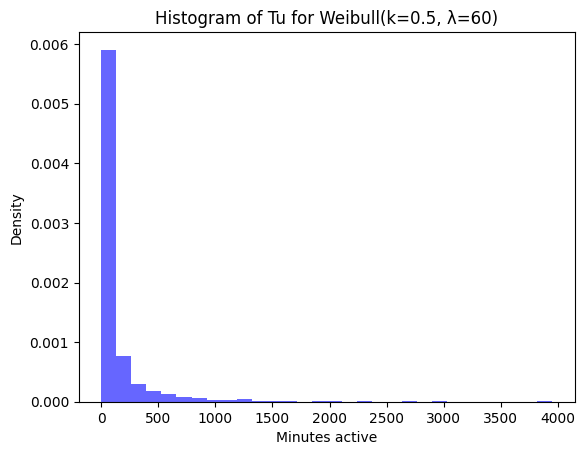

Weibull(k=1.0, λ=60):
  Users active after 150 minutes: 81
  Users active after 1440 minutes: 0
  Users active after 2880 minutes: 0
  Users active after 7200 minutes: 0



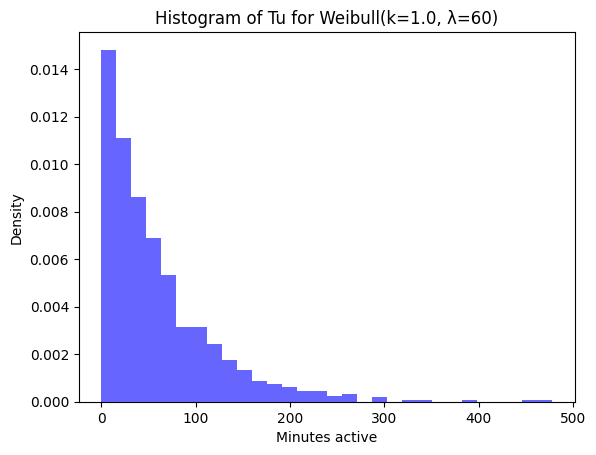

Weibull(k=1.5, λ=60):
  Users active after 150 minutes: 16
  Users active after 1440 minutes: 0
  Users active after 2880 minutes: 0
  Users active after 7200 minutes: 0



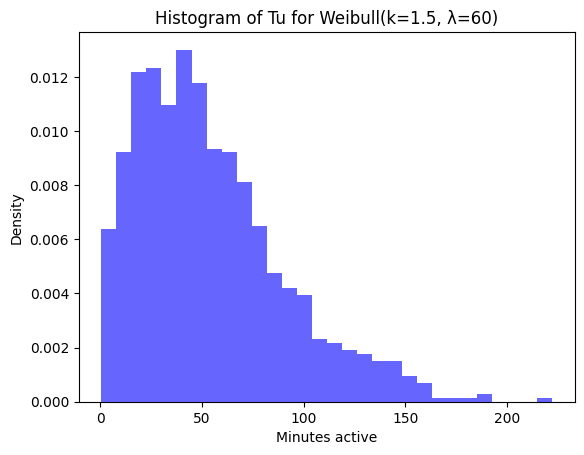

Weibull(k=2.5, λ=60):
  Users active after 150 minutes: 0
  Users active after 1440 minutes: 0
  Users active after 2880 minutes: 0
  Users active after 7200 minutes: 0



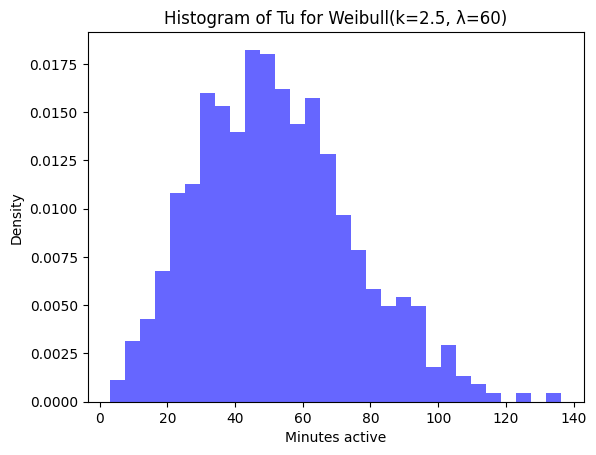

Gaussian(μ=60, σ=40):
  Users active after 150 minutes: 0
  Users active after 1440 minutes: 0
  Users active after 2880 minutes: 0
  Users active after 7200 minutes: 0



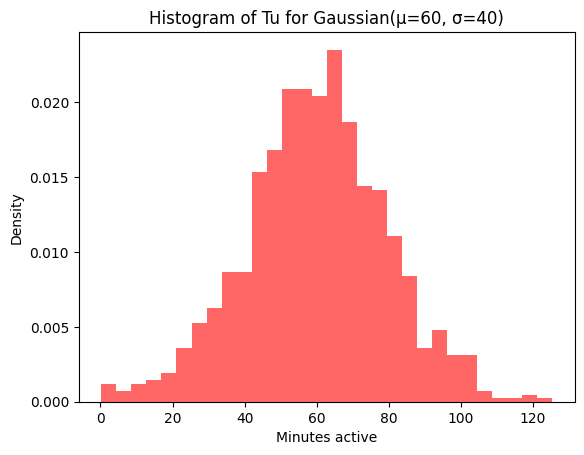

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

N = 1000
time_points = [150, 24*60, 2*24*60, 5*24*60]

params_weibull = [(0.5, 60), (1.0, 60), (1.5, 60), (2.5, 60)]

for k, lambda_ in params_weibull:
    Tu = stats.weibull_min.rvs(c=k, scale=lambda_, size=N)
    active_users = {t: np.sum(Tu > t) for t in time_points}

    print(f"Weibull(k={k}, λ={lambda_}):")
    for t, count in active_users.items():
        print(f"  Users active after {t} minutes: {count}")
    print()

    plt.hist(Tu, bins=30, density=True, alpha=0.6, color='b')
    plt.title(f"Histogram of Tu for Weibull(k={k}, λ={lambda_})")
    plt.xlabel("Minutes active")
    plt.ylabel("Density")
    plt.show()


mean_gauss = 60
std_gauss = 20

Tu_gauss = np.abs(np.random.normal(loc=mean_gauss, scale=std_gauss, size=N))
active_users_gauss = {t: np.sum(Tu_gauss > t) for t in time_points}

print("Gaussian(μ=60, σ=40):")
for t, count in active_users_gauss.items():
    print(f"  Users active after {t} minutes: {count}")
print()

plt.hist(Tu_gauss, bins=30, density=True, alpha=0.6, color='r')
plt.title("Histogram of Tu for Gaussian(μ=60, σ=40)")
plt.xlabel("Minutes active")
plt.ylabel("Density")
plt.show()


- Gaussian: Symmetric, meaning some users may have unrealistically high activity times.

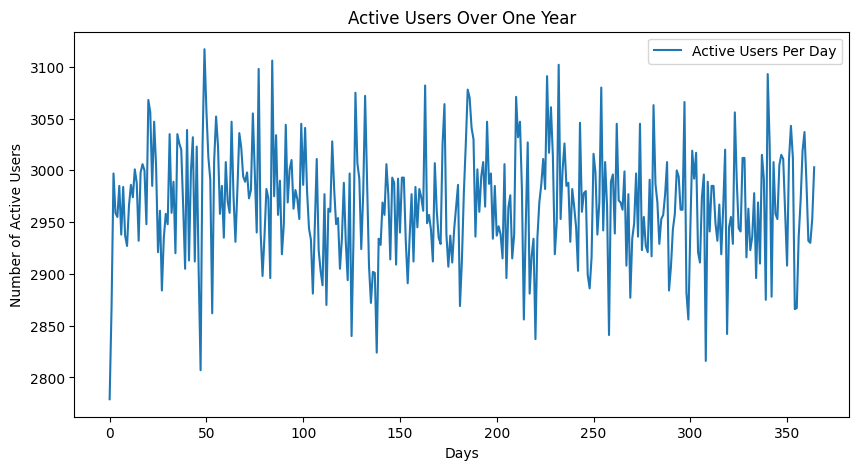

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

N = 1000000
days_in_year = 365
minutes_in_year = days_in_year * 24 * 60


tu = np.random.uniform(0, minutes_in_year, N)


k, lambda_ = 0.5, 60
Tu = stats.weibull_min.rvs(c=k, scale=lambda_, size=N)


days = np.arange(days_in_year)
active_users_per_day = []

for day in days:
    time_min = day * 24 * 60
    time_max = (day + 1) * 24 * 60
    active_users = np.sum((tu <= time_max) & (tu + Tu > time_min))
    active_users_per_day.append(active_users)


plt.figure(figsize=(10, 5))
plt.plot(days, active_users_per_day, label='Active Users Per Day')
plt.xlabel("Days")
plt.ylabel("Number of Active Users")
plt.title("Active Users Over One Year")
plt.legend()
plt.show()


# ZAD. 1 - LIST 03

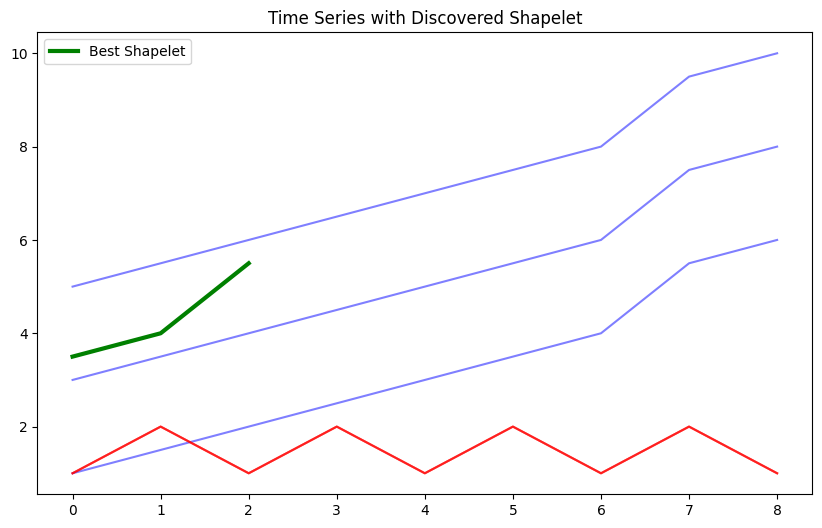

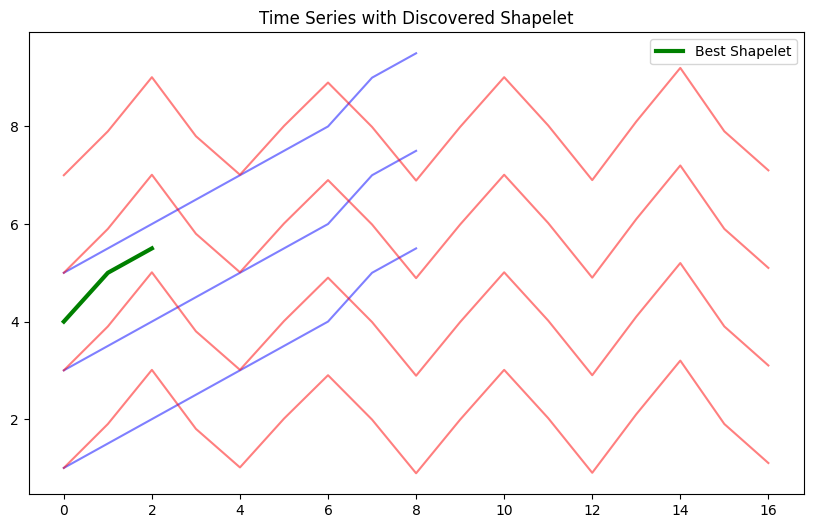

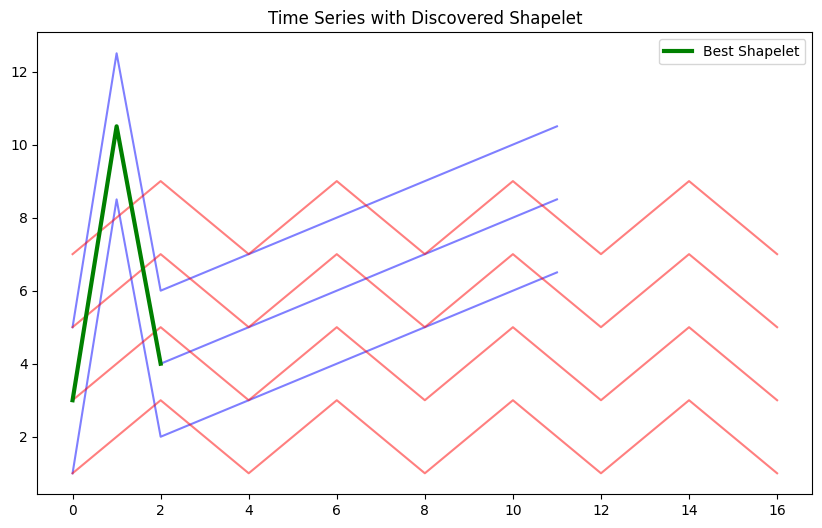

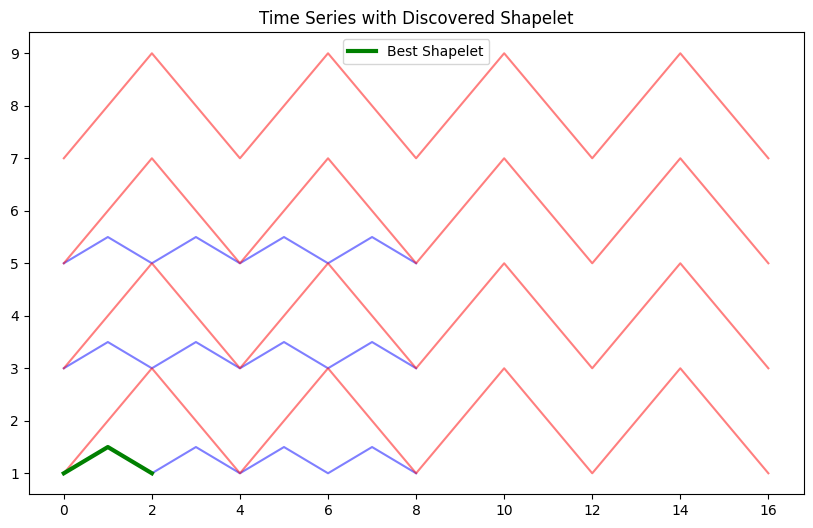

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def SubsequenceDist(T, S):
    n = len(T)
    m = len(S)
    distances = []
    for i in range(n - m + 1):
        subsequence = T[i:i + m]
        dist = np.linalg.norm(subsequence - S)
        distances.append(dist)
    return min(distances)

def GenerateCandidates(D, MAXLEN, MINLEN):
    candidates = []
    for time_series, label in D:
        for length in range(MINLEN, MAXLEN + 1):
            for i in range(len(time_series) - length + 1):
                candidates.append(time_series[i:i + length])
    return candidates

def entropy(labels):
    class_counts = np.bincount(labels)
    probs = class_counts / len(labels)
    probs = probs[probs > 0]
    return -np.sum(probs * np.log(probs + 1e-6))

def CalculateInformationGain(dist_values, class_labels):
    best_gain = -np.inf
    best_split = None
    for split_dist in dist_values:
        group1 = class_labels[dist_values <= split_dist]
        group2 = class_labels[dist_values > split_dist]
        entropy_before = entropy(class_labels)
        entropy_group1 = entropy(group1)
        entropy_group2 = entropy(group2)
        f_group1 = len(group1) / len(class_labels)
        f_group2 = len(group2) / len(class_labels)
        entropy_after = f_group1 * entropy_group1 + f_group2 * entropy_group2
        gain = entropy_before - entropy_after
        if gain > best_gain:
            best_gain = gain
            best_split = split_dist
    return best_gain

def CheckCandidate(D, S):
    dist_values = []
    class_labels = []
    for T, label in D:
        dist = SubsequenceDist(T, S)
        dist_values.append(dist)
        class_labels.append(label)
    dist_values = np.array(dist_values)
    class_labels = np.array(class_labels)
    gain = CalculateInformationGain(dist_values, class_labels)
    return gain

def FindingShapeletBF(D, MAXLEN, MINLEN):
    candidates = GenerateCandidates(D, MAXLEN, MINLEN)
    bsf_gain = 0
    bsf_shapelet = None
    for S in candidates:
        gain = CheckCandidate(D, S)
        if gain > bsf_gain:
            bsf_gain = gain
            bsf_shapelet = S
    return bsf_shapelet

def create_synthetic_data_1():
    class_0_shape = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 5.5, 6])
    class_0 = [
        class_0_shape + 0,
        class_0_shape + 2,
        class_0_shape + 4,
    ]
    zig_zag_shapelet = np.array([1, 3, 2, 4, 3])
    class_1 = [
        np.array([1, 2, 1, 2, 1, 2, 1, 2, 1]),
        np.array([1, 2, 1, 2, 1, 2, 1, 2, 1]),
        np.array([1, 2, 1, 2, 1, 2, 1, 2, 1]),
    ]
    D = [(ts, 0) for ts in class_0] + [(ts, 1) for ts in class_1]
    return D

def create_synthetic_data_2():
    class_0_shape = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 5.5])
    class_0 = [
        class_0_shape + 0,
        class_0_shape + 2,
        class_0_shape + 4,
    ]
    zig_zag_shape = np.array([1, 1.9, 3.01, 1.8, 1.01, 2.01, 2.9, 1.99, 0.89, 1.99, 3.01, 2.02, 0.9, 2.1, 3.2, 1.9, 1.1])
    class_1 = [
        zig_zag_shape + 0,
        zig_zag_shape + 2,
        zig_zag_shape + 4,
        zig_zag_shape + 6,
    ]
    D = [(ts, 0) for ts in class_0] + [(ts, 1) for ts in class_1]
    return D

def create_synthetic_data_3():
    class_0_shape = np.array([1, 8.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5])
    class_0 = [
        class_0_shape + 0,
        class_0_shape + 2,
        class_0_shape + 4,
    ]
    zig_zag_shape = np.array([1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1])
    class_1 = [
        zig_zag_shape + 0,
        zig_zag_shape + 2,
        zig_zag_shape + 4,
        zig_zag_shape + 6,
    ]
    D = [(ts, 0) for ts in class_0] + [(ts, 1) for ts in class_1]
    return D

def create_synthetic_data_4():
    class_0_shape = np.array([1, 1.5, 1, 1.5, 1, 1.5, 1, 1.5, 1])
    class_0 = [
        class_0_shape + 0,
        class_0_shape + 2,
        class_0_shape + 4,
    ]
    zig_zag_shape = np.array([1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1])
    class_1 = [
        zig_zag_shape + 0,
        zig_zag_shape + 2,
        zig_zag_shape + 4,
        zig_zag_shape + 6,
    ]
    D = [(ts, 0) for ts in class_0] + [(ts, 1) for ts in class_1]
    return D

def test_datasets():
    datasets = [create_synthetic_data_1(), create_synthetic_data_2(), create_synthetic_data_3(), create_synthetic_data_4()]
    MAXLEN = 5
    MINLEN = 3
    for D in datasets:
        best_shapelet = FindingShapeletBF(D, MAXLEN, MINLEN)
        plt.figure(figsize=(10, 6))
        for ts, label in D:
            if label == 0:
                plt.plot(ts, color='blue', alpha=0.5)
        for ts, label in D:
            if label == 1:
                plt.plot(ts, color='red', alpha=0.5)
        if best_shapelet is not None:
            plt.plot(best_shapelet, color='green', linewidth=3, label='Best Shapelet')
        plt.title(f"Time Series with Discovered Shapelet")
        plt.legend()
        plt.show()

test_datasets()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def SubsequenceDist(T, S):
    n = len(T)
    m = len(S)
    distances = []
    for i in range(n - m + 1):
        subsequence = T[i:i + m]
        dist = np.linalg.norm(subsequence - S)
        distances.append(dist)
    return min(distances)

def GenerateCandidates(D, MAXLEN, MINLEN):
    candidates = []
    for time_series, label in D:
        for length in range(MINLEN, MAXLEN + 1):
            for i in range(len(time_series) - length + 1):
                candidates.append(time_series[i:i + length])
    return candidates

def entropy(labels):
    class_counts = np.bincount(labels)
    probs = class_counts / len(labels)
    probs = probs[probs > 0]
    return -np.sum(probs * np.log(probs + 1e-6))

def CalculateInformationGain(dist_values, class_labels):
    best_gain = -np.inf
    best_split = None
    for split_dist in dist_values:
        group1 = class_labels[dist_values <= split_dist]
        group2 = class_labels[dist_values > split_dist]
        entropy_before = entropy(class_labels)
        entropy_group1 = entropy(group1)
        entropy_group2 = entropy(group2)
        f_group1 = len(group1) / len(class_labels)
        f_group2 = len(group2) / len(class_labels)
        entropy_after = f_group1 * entropy_group1 + f_group2 * entropy_group2
        gain = entropy_before - entropy_after
        if gain > best_gain:
            best_gain = gain
            best_split = split_dist
    return best_gain

def CheckCandidate(D, S):
    dist_values = []
    class_labels = []
    for T, label in D:
        dist = SubsequenceDist(T, S)
        dist_values.append(dist)
        class_labels.append(label)
    dist_values = np.array(dist_values)
    class_labels = np.array(class_labels)
    gain = CalculateInformationGain(dist_values, class_labels)
    return gain

def FindingShapeletBF(D, MAXLEN, MINLEN):
    candidates = GenerateCandidates(D, MAXLEN, MINLEN)
    bsf_gain = 0
    bsf_shapelet = None
    for S in candidates:
        gain = CheckCandidate(D, S)
        if gain > bsf_gain:
            bsf_gain = gain
            bsf_shapelet = S
    return bsf_shapelet

def add_noise(time_series, noise_level=0.05):
    return time_series + np.random.normal(0, noise_level, size=time_series.shape)

def create_synthetic_data_1():
    class_0_shape = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 5.5, 6])
    class_0 = [
        add_noise(class_0_shape + 0),
        add_noise(class_0_shape + 0.2),
        add_noise(class_0_shape + 0.4),
    ]
    zig_zag_shape = np.array([1, 1.9, 3.01, 1.8, 1.01, 2.01, 2.9, 1.99, 0.89, 1.99, 3.01, 2.02, 0.9, 2.1, 3.2, 1.9, 1.1])
    class_1 = [
        add_noise(zig_zag_shape + 0),
        add_noise(zig_zag_shape + 0.2),
        add_noise(zig_zag_shape + 0.4),
        add_noise(zig_zag_shape + 0.6),
    ]
    D = [(ts, 0) for ts in class_0] + [(ts, 1) for ts in class_1]
    return D

def create_synthetic_data_2():
    class_0_shape = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 5.5])
    class_0 = [
        add_noise(class_0_shape + 0),
        add_noise(class_0_shape + 0.2),
        add_noise(class_0_shape + 0.4),
    ]
    zig_zag_shape = np.array([1, 1.9, 3.01, 1.8, 1.01, 2.01, 2.9, 1.99, 0.89, 1.99, 3.01, 2.02, 0.9, 2.1, 3.2, 1.9, 1.1])
    class_1 = [
       add_noise(zig_zag_shape + 0),
        add_noise(zig_zag_shape + 0.2),
        add_noise(zig_zag_shape + 0.4),
        add_noise(zig_zag_shape + 0.6),
    ]
    D = [(ts, 0) for ts in class_0] + [(ts, 1) for ts in class_1]
    return D

def create_synthetic_data_3():
    class_0_shape = np.array([1, 8.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5])
    class_0 = [
        add_noise(class_0_shape + 0),
        add_noise(class_0_shape + 0.2),
        add_noise(class_0_shape + 0.4),
    ]
    zig_zag_shape = np.array([1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1])
    class_1 = [
        add_noise(zig_zag_shape + 0),
        add_noise(zig_zag_shape + 0.2),
        add_noise(zig_zag_shape + 0.4),
        add_noise(zig_zag_shape + 0.6),
    ]
    D = [(ts, 0) for ts in class_0] + [(ts, 1) for ts in class_1]
    return D

def create_synthetic_data_4():
    class_0_shape = np.array([1, 1.5, 1, 1.5, 1, 1.5, 1, 1.5, 1])
    class_0 = [
        add_noise(class_0_shape + 0),
        add_noise(class_0_shape + 0.2),
        add_noise(class_0_shape + 0.4),
    ]
    zig_zag_shape = np.array([1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1])
    class_1 = [
        add_noise(zig_zag_shape + 0),
        add_noise(zig_zag_shape + 0.2),
        add_noise(zig_zag_shape + 0.4),
        add_noise(zig_zag_shape + 0.6),
    ]
    D = [(ts, 0) for ts in class_0] + [(ts, 1) for ts in class_1]
    return D

def test_datasets():
    datasets = [create_synthetic_data_1(), create_synthetic_data_2(), create_synthetic_data_3(), create_synthetic_data_4()]
    MAXLEN = 5
    MINLEN = 3
    for D in datasets:
        best_shapelet = FindingShapeletBF(D, MAXLEN, MINLEN)
        plt.figure(figsize=(10, 6))
        for ts, label in D:
            if label == 0:
                plt.plot(ts, color='blue', alpha=0.5)
        for ts, label in D:
            if label == 1:
                plt.plot(ts, color='red', alpha=0.5)
        if best_shapelet is not None:
            plt.plot(best_shapelet, color='green', linewidth=3, label='Best Shapelet')
        plt.title(f"Time Series with Discovered Shapelet")
        plt.legend()
        plt.show()




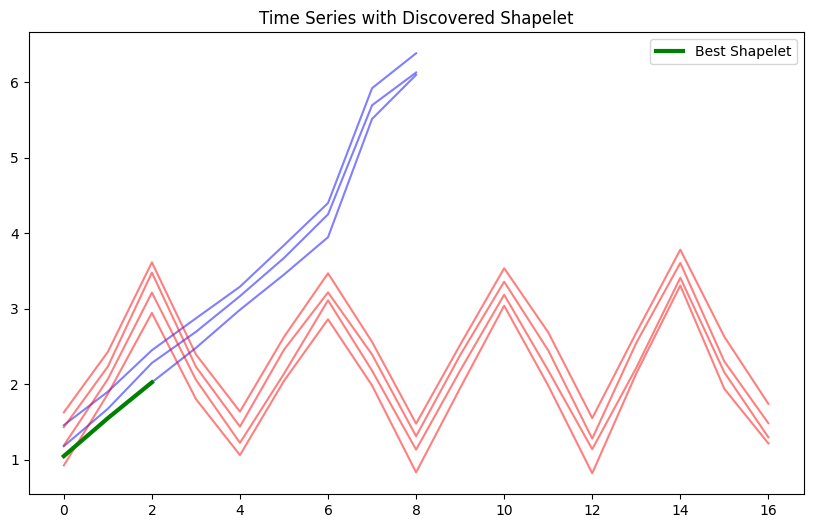

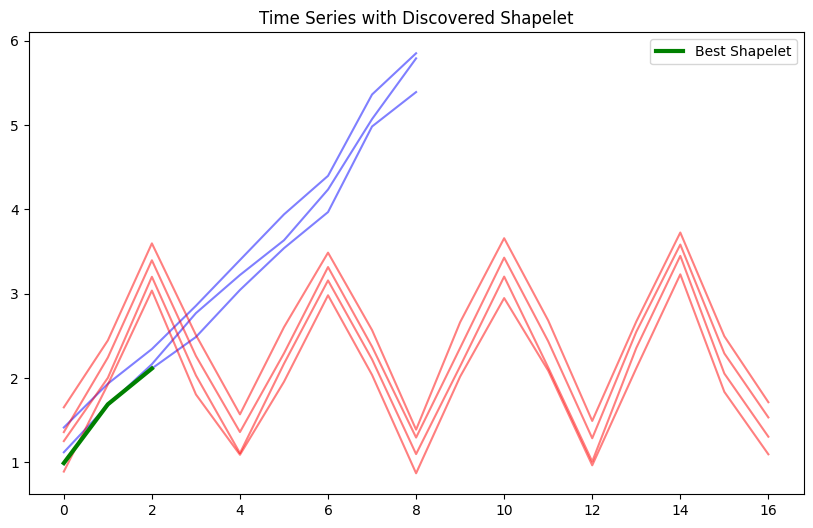

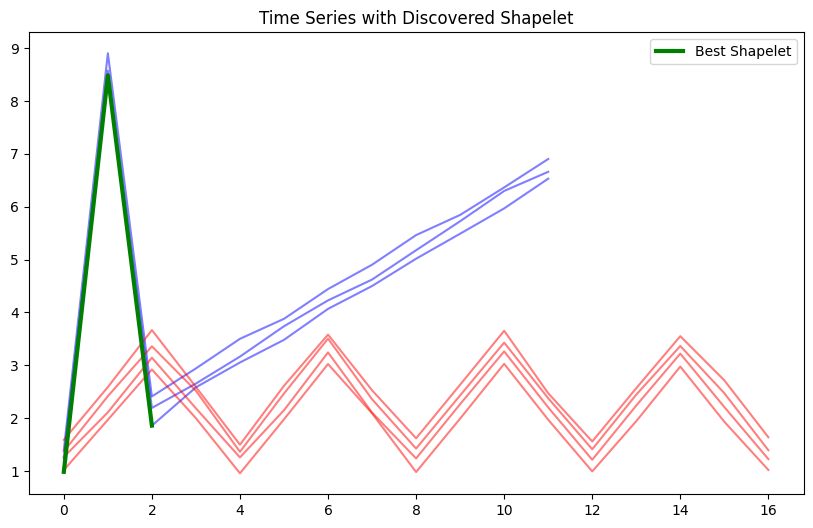

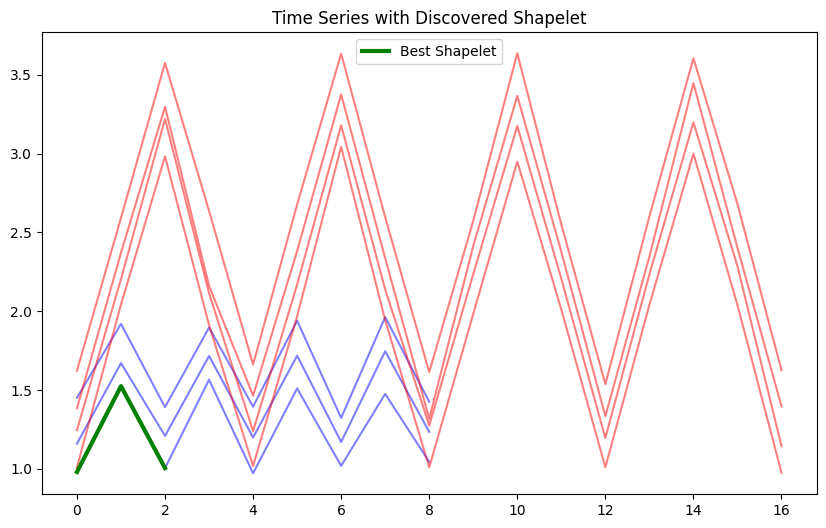

Computation time: 1.4073 seconds


In [ ]:
import time
def evaluate_computation_time():
    start_time = time.time()
    test_datasets()
    end_time = time.time()
    print(f"Computation time: {end_time - start_time:.4f} seconds")

evaluate_computation_time()


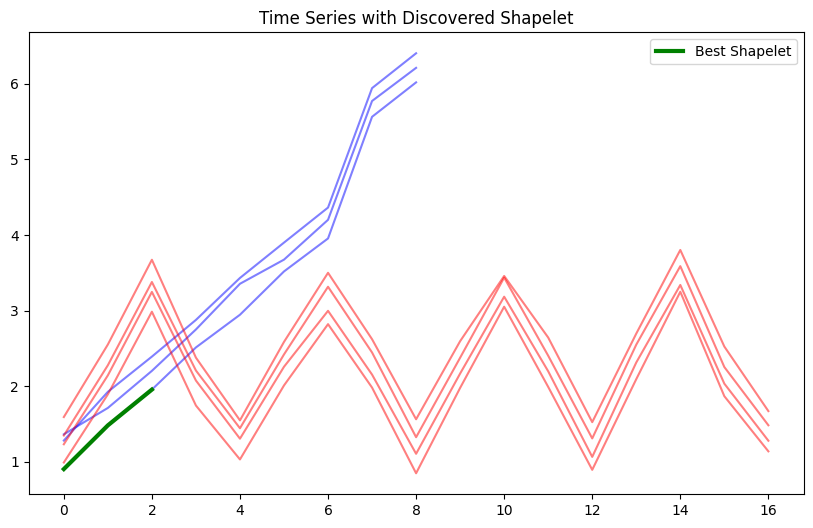

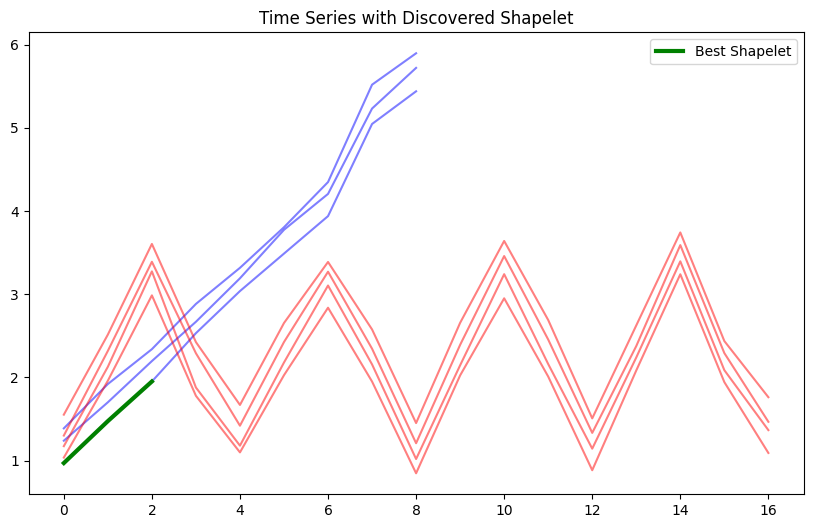

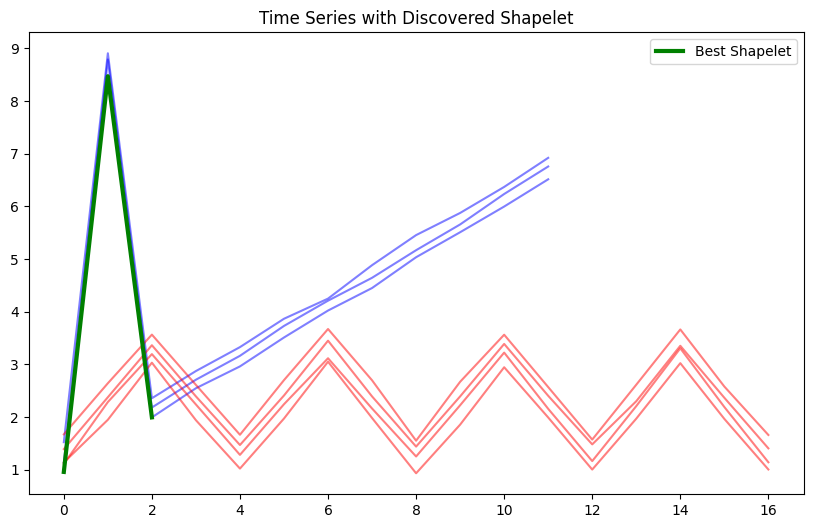

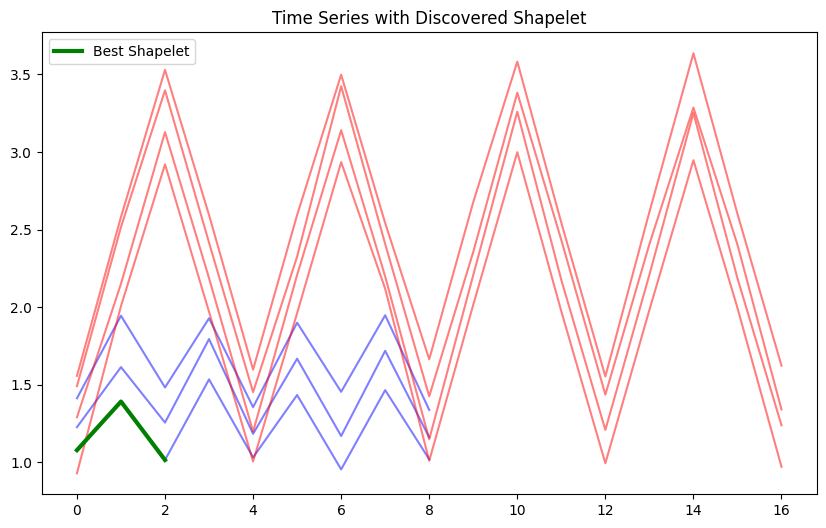

Computation time: 3.3184 seconds


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from collections import defaultdict

def SubsequenceDist(T, S, cache=None):
    n = len(T)
    m = len(S)
    # check if the distance has already been computed for this subsequence pair
    if cache is None:
        cache = {}
    if (tuple(T), tuple(S)) in cache:
        return cache[(tuple(T), tuple(S))]
    distances = np.array([np.linalg.norm(T[i:i + m] - S) for i in range(n - m + 1)])
    min_distance = np.min(distances)
    cache[(tuple(T), tuple(S))] = min_distance
    return min_distance

def GenerateCandidates(D, MAXLEN, MINLEN):
    candidates = []
    for time_series, label in D:
        for length in range(MINLEN, MAXLEN + 1):
            for i in range(len(time_series) - length + 1):
                candidates.append(time_series[i:i + length])
    return candidates

def entropy(labels):
    # caching entropy to avoid redundant calculations
    cache = defaultdict(float)
    class_counts = np.bincount(labels)
    probs = class_counts / len(labels)
    probs = probs[probs > 0]
    entropy_value = -np.sum(probs * np.log(probs + 1e-6))
    return entropy_value

def CalculateInformationGain(dist_values, class_labels):
    best_gain = -np.inf
    best_split = None
    for split_dist in dist_values:
        group1 = class_labels[dist_values <= split_dist]
        group2 = class_labels[dist_values > split_dist]
        entropy_before = entropy(class_labels)
        entropy_group1 = entropy(group1)
        entropy_group2 = entropy(group2)
        f_group1 = len(group1) / len(class_labels)
        f_group2 = len(group2) / len(class_labels)
        entropy_after = f_group1 * entropy_group1 + f_group2 * entropy_group2
        gain = entropy_before - entropy_after
        if gain > best_gain:
            best_gain = gain
            best_split = split_dist
    return best_gain

def CheckCandidate(D, S, cache=None):
    dist_values = np.array([SubsequenceDist(T, S, cache) for T, label in D])
    class_labels = np.array([label for T, label in D])
    return CalculateInformationGain(dist_values, class_labels)

def FindingShapeletBF(D, MAXLEN, MINLEN):
    candidates = GenerateCandidates(D, MAXLEN, MINLEN)
    best_gain = 0
    best_shapelet = None
    cache = {}  # cache for subsequence distances
    with ThreadPoolExecutor() as executor:
        # parallelize the checking of candidates
        gains = list(executor.map(lambda S: CheckCandidate(D, S, cache), candidates))
        best_gain = max(gains)
        best_shapelet = candidates[gains.index(best_gain)]
    return best_shapelet

def test_datasets():
    datasets = [create_synthetic_data_1(), create_synthetic_data_2(), create_synthetic_data_3(), create_synthetic_data_4()]
    MAXLEN = 5
    MINLEN = 3
    for D in datasets:
        best_shapelet = FindingShapeletBF(D, MAXLEN, MINLEN)
        plt.figure(figsize=(10, 6))
        for ts, label in D:
            if label == 0:
                plt.plot(ts, color='blue', alpha=0.5)
        for ts, label in D:
            if label == 1:
                plt.plot(ts, color='red', alpha=0.5)
        if best_shapelet is not None:
            plt.plot(best_shapelet, color='green', linewidth=3, label='Best Shapelet')
        plt.title(f"Time Series with Discovered Shapelet")
        plt.legend()
        plt.show()

def evaluate_computation_time():
    start_time = time.time()
    test_datasets()
    end_time = time.time()
    print(f"Computation time: {end_time - start_time:.4f} seconds")

evaluate_computation_time()


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

# --- NO CACHING, NO PARALLELIZATION ---
def SubsequenceDist_NoCache(T, S):
    n, m = len(T), len(S)
    return min(np.linalg.norm(T[i:i + m] - S) for i in range(n - m + 1))

def CheckCandidate_NoCache(D, S):
    dist_values = np.array([SubsequenceDist_NoCache(T, S) for T, label in D])
    class_labels = np.array([label for T, label in D])
    return CalculateInformationGain(dist_values, class_labels)

def FindingShapeletBF_NoCache(D, MAXLEN, MINLEN):
    candidates = GenerateCandidates(D, MAXLEN, MINLEN)
    best_gain, best_shapelet = 0, None
    for S in candidates:
        gain = CheckCandidate_NoCache(D, S)
        if gain > best_gain:
            best_gain, best_shapelet = gain, S
    return best_shapelet

# --- CACHING + PARALLELIZATION ---
def SubsequenceDist_Cache(T, S, cache):
    key = (tuple(T), tuple(S))
    if key in cache:
        return cache[key]

    n, m = len(T), len(S)
    min_distance = min(np.linalg.norm(T[i:i + m] - S) for i in range(n - m + 1))

    cache[key] = min_distance
    return min_distance

def CheckCandidate_Cache(D, S, cache):
    dist_values = np.array([SubsequenceDist_Cache(T, S, cache) for T, label in D])
    class_labels = np.array([label for T, label in D])
    return CalculateInformationGain(dist_values, class_labels)

def FindingShapeletBF_Cache(D, MAXLEN, MINLEN):
    candidates = GenerateCandidates(D, MAXLEN, MINLEN)
    best_gain, best_shapelet = 0, None
    cache = {}  # Distance cache

    with ThreadPoolExecutor() as executor:
        gains = list(executor.map(lambda S: CheckCandidate_Cache(D, S, cache), candidates))

    best_gain = max(gains)
    best_shapelet = candidates[gains.index(best_gain)]
    return best_shapelet

def GenerateCandidates(D, MAXLEN, MINLEN):
    candidates = []
    for time_series, label in D:
        for length in range(MINLEN, MAXLEN + 1):
            for i in range(len(time_series) - length + 1):
                candidates.append(time_series[i:i + length])
    return candidates

def entropy(labels):
    class_counts = np.bincount(labels)
    probs = class_counts / len(labels)
    probs = probs[probs > 0]
    return -np.sum(probs * np.log(probs + 1e-6))

def CalculateInformationGain(dist_values, class_labels):
    best_gain = -np.inf
    for split_dist in dist_values:
        group1, group2 = class_labels[dist_values <= split_dist], class_labels[dist_values > split_dist]
        entropy_before = entropy(class_labels)
        entropy_after = (len(group1) / len(class_labels)) * entropy(group1) + (len(group2) / len(class_labels)) * entropy(group2)
        gain = entropy_before - entropy_after
        best_gain = max(best_gain, gain)
    return best_gain

def create_long_synthetic_data():
    class_0 = [np.sin(np.linspace(0, 20 * np.pi, 100))  for _ in range(10)]
    class_1 = [np.cos(np.linspace(0, 20 * np.pi, 100))  for _ in range(10)]
    return [(ts, 0) for ts in class_0] + [(ts, 1) for ts in class_1]

def compare_execution_times():
    D = create_long_synthetic_data()
    MAXLEN, MINLEN = 10, 5

    print("Running version without caching & without parallelization...")
    start_time = time.time()
    FindingShapeletBF_NoCache(D, MAXLEN, MINLEN)
    no_cache_time = time.time() - start_time
    print(f"Execution Time (No Cache, No Parallelization): {no_cache_time:.4f} seconds\n")

    print("Running version with caching & parallelization...")
    start_time = time.time()
    FindingShapeletBF_Cache(D, MAXLEN, MINLEN)
    cache_time = time.time() - start_time
    print(f"Execution Time (With Cache & Parallelization): {cache_time:.4f} seconds\n")

    print(f"Speed Improvement: {no_cache_time / cache_time:.2f}x faster with caching & parallelization")


compare_execution_times()


Running version without caching & without parallelization...
Execution Time (No Cache, No Parallelization): 99.5724 seconds

Running version with caching & parallelization...
Execution Time (With Cache & Parallelization): 28.2783 seconds

Speed Improvement: 3.52x faster with caching & parallelization


# ZAD. 2 - LIST 03

In [ ]:
pip install pyts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.5 MB/s eta 0:00:00


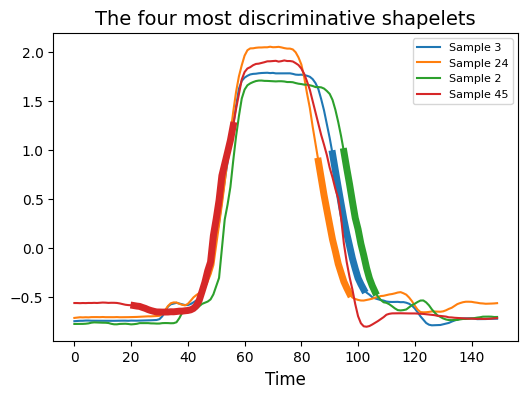

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.transformation import ShapeletTransform


X_train, _, y_train, _ = load_gunpoint(return_X_y=True)


st = ShapeletTransform(window_sizes=[12, 24, 36, 48],
                       random_state=42, sort=True)
X_new = st.fit_transform(X_train, y_train)


plt.figure(figsize=(6, 4))
for i, index in enumerate(st.indices_[:4]):
    idx, start, end = index
    plt.plot(X_train[idx], color='C{}'.format(i),
             label='Sample {}'.format(idx))
    plt.plot(np.arange(start, end), X_train[idx, start:end],
             lw=5, color='C{}'.format(i))

plt.xlabel('Time', fontsize=12)
plt.title('The four most discriminative shapelets', fontsize=14)
plt.legend(loc='best', fontsize=8)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


train_data = np.loadtxt('ArrowHead_TRAIN.txt')
test_data = np.loadtxt('ArrowHead_TEST.txt')

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

y_train = train_data[:, 0]
y_test = test_data[:, 0]

X_train = train_data[:, 1:]
X_test = test_data[:, 1:]



Train data shape: (36, 252)
Test data shape: (175, 252)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  8.0min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.8min
[Parallel(n_jo

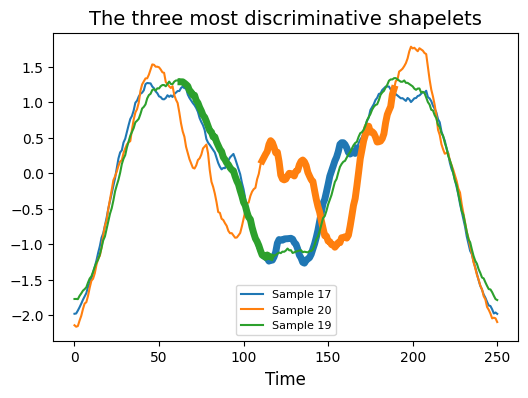

In [ ]:
import numpy as np


train_data = np.loadtxt('ArrowHead_TRAIN.txt')


np.random.seed(42)
np.random.shuffle(train_data)


subset_size = 50
train_data_subsampled = train_data[:subset_size]


y_train_subsampled = train_data_subsampled[:, 0]
X_train_subsampled = train_data_subsampled[:, 1:]

'''
y_train = train_data[:, 0]
y_test = test_data[:, 0]
X_train = train_data[:, 1:]
X_test = test_data[:, 1:]


st = ShapeletTransform(random_state=42, sort=True, n_shapelets=3)
X_new = st.fit_transform(X_train, y_train)

'''

from pyts.transformation import ShapeletTransform

st = ShapeletTransform(random_state=42, n_shapelets=3, n_jobs=-1, verbose=100)
X_new = st.fit_transform(X_train_subsampled, y_train_subsampled)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
for i, index in enumerate(st.indices_[:3]):
    idx, start, end = index
    plt.plot(X_train_subsampled[idx], color='C{}'.format(i), label='Sample {}'.format(idx))
    plt.plot(np.arange(start, end), X_train_subsampled[idx, start:end], lw=5, color='C{}'.format(i))

plt.xlabel('Time', fontsize=12)
plt.title('The three most discriminative shapelets', fontsize=14)
plt.legend(loc='best', fontsize=8)
plt.show()


(84, 144) (84,)


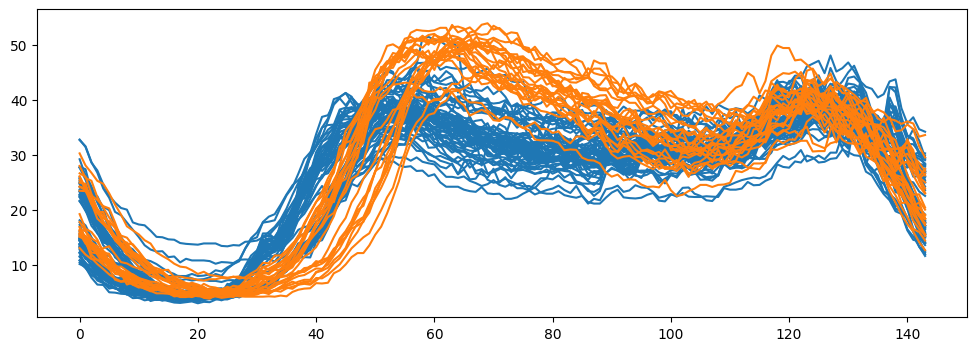

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  2.4min remaining:   36.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jo

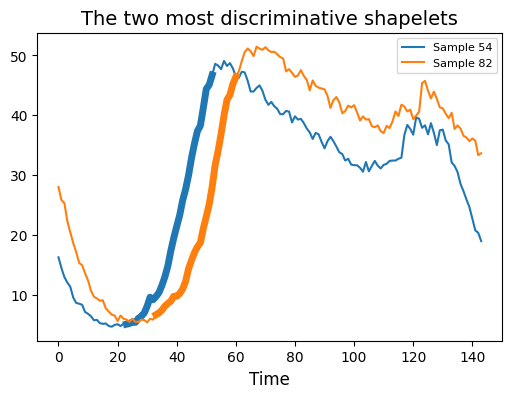

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.transformation import ShapeletTransform

df = pd.read_csv('water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df = df.set_index('date')
df_ = df.groupby([df.index.month, df.index.weekday]).mean()
X = df_.values
y = df_.reset_index([1])['date'].map(lambda x: 0 if x < 5 else 1).values
N = len(y)

print(X.shape, y.shape)

plt.figure(figsize=(12, 4))
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

st = ShapeletTransform( random_state=42, n_shapelets=2, n_jobs=-1, verbose=100)
X_new = st.fit_transform(X, y)

plt.figure(figsize=(6, 4))
for i, index in enumerate(st.indices_[:2]):
    idx, start, end = index
    plt.plot(X[idx], color='C{}'.format(i), label='Sample {}'.format(idx))
    plt.plot(np.arange(start, end), X[idx, start:end], lw=5, color='C{}'.format(i))

plt.xlabel('Time', fontsize=12)
plt.title('The two most discriminative shapelets', fontsize=14)
plt.legend(loc='best', fontsize=8)
plt.show()
